# <center> HR ANALYTICS  </center>

##### MADE BY - Ashutosh Sahay


# <center> TABLE OF CONTENTS </center>

<h4>
<ol>
    <li> Loading required libraries and datasets<br>
    <br><li> Preprocessing 
        <ol>
            <li> Basic Preprocessing
            <li> Splitting the datasets
        </ol>
        <br>
    <li> EDA <br>
   <br><li> Feature Engineering<br>
   <br><li> Feature Selection
        <ol> 
            <li> Forward Selection
            <li> Backward Selection
            <li> Recursive Elimination
            <li> Tree Based Selection
            <li> Feature Scaling
         </ol><br>
    <br> <li> Model Training
         <ol> 
            <li> Logistic Regression Classification
            <li> Decision Trees
            <li> Random Forest
            <li> XGBoost
            <li> KNN
         </ol><br> 
     <li> Hyperparameter Tuning <br> 
    <br>  <li> Predictions on Test Set 
 </ol>
    </h4>

<br>

# <center> ----- Loading required libraries and datasets ----- </center>

<br>

In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hranalysis/train.csv
/kaggle/input/hranalysis/test.csv


In [81]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For splitting 
from collections import Counter
from sklearn.model_selection import train_test_split

# For Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFECV

# Modeling & Accuracy Metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# For HyperParameter Tuning
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [82]:
#Reading Train data set
dftrain = pd.read_csv("/kaggle/input/hranalysis/train.csv")
dftrain.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [83]:
#Reading Test data set
test=pd.read_csv("/kaggle/input/hranalysis/test.csv")
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [84]:
#Shapes of both the data sets
print("Original Train Set Shape : ",dftrain.shape)
print("Test Set Shape :  ",test.shape)

Original Train Set Shape :  (54808, 14)
Test Set Shape :   (23490, 13)


<br>

# <center> ----- PREPROCESSING ----- </center>

<br>

***1. Preprocessing lets us to clean data and remove any inconsistencies like null value, duplicate values etc to make further model bulding process hassle free***

In [85]:
dftrain.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


***This shows a summary of numerical columns***

In [86]:
#checking for duplicate rows
dupl=dftrain[dftrain.duplicated()]
dupl.shape

(0, 14)

***There are no duplicate rows in the dataframe***

In [87]:
#Data types of features
dftrain.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

**TOTAL FEATURES - 14<br>
    Categorical Features - 5<br>
    Numerical Featues - 9<br>**

In [88]:
#Unique values summary of total data set
dftrain.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

***None of the columns have unique value =1 ; this means there are no constant columns***

In [89]:
#Null values summary of total data set
dftrain.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

   ***i) Since 'education' is a categorical feature here and it also signifies whether the person has obtained a particular level of education or not, we cannot impute the null values as we can't assign an education level to a person on our own. The person may or may not have achieved the assigned level and this will result in an inaccurate analysis***

***ii) On the other hand, 'previous_year_rating' is a numerical feature and it signifies the rating of the employee in the previous year. The NULL value in this column indicates that the employee has been a part of the company for LESS THAN 1 YEAR and does not have a previous year score. Hence we can inmpute these null values with 0*** 

In [90]:
dftrain['previous_year_rating'].fillna(0,inplace=True)
dftrain['previous_year_rating'].isnull().sum()

0

***No null value remaining in 'previous_year_rating'***

In [91]:
dftrain[dftrain['is_promoted']==1].shape

(4668, 14)

***There are 4668 records where the value of target variable i.e, 'is_promoted' is 1.***

In [92]:
dftrain[dftrain.education.isnull()].is_promoted.sum()

122

***Since out of 54808 records in the train set, 2409 records(4.39% of 54808) have NULL in education and out of those 2409 records, 122 records(2.6% of 4668) have 'is_promoted' value as 1. So we can drop these records as they won't bring a significant change in our predictions in the future.***

In [93]:
#Dropping records with education=NULL
dftrain=dftrain.dropna()
dftrain.shape #2409 records dropped

(52399, 14)

In [94]:
dftrain.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

***FOR TEST SET***

In [95]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [96]:
test['previous_year_rating'].fillna(0,inplace=True)
test['previous_year_rating'].isnull().sum()

0

In [97]:
#Dropping records with education=NULL
test=test.dropna()
test.shape #1034 records dropped

(22456, 13)

### Splitting the dataset

It is desirable to split the dataset in such a way that preserves the same proportions of examples in each class as observed in the original dataset.

In [98]:
#Splitting dataset into train set and validation set
train,val=train_test_split(dftrain,test_size=0.30,random_state=1,stratify=dftrain.is_promoted)

In [99]:
print("After Splitting: \n")
print("Train set shape : \t",train.shape)
print("Validation set shape : \t",val.shape)
print("\nTarget Variable in Original Data :\t",Counter(dftrain.is_promoted))
print("Target Variable in Train Data : \t",Counter(train.is_promoted))
print("Target Variable in Validation Data :\t",Counter(val.is_promoted))


After Splitting: 

Train set shape : 	 (36679, 14)
Validation set shape : 	 (15720, 14)

Target Variable in Original Data :	 Counter({0: 47853, 1: 4546})
Target Variable in Train Data : 	 Counter({0: 33497, 1: 3182})
Target Variable in Validation Data :	 Counter({0: 14356, 1: 1364})


In [100]:
#Further splitting Validation set in Val1 and Val2 set for better analysis
val1,val2=train_test_split(val,test_size=0.50,random_state=1,stratify=val.is_promoted)

In [101]:
print("After Further Splitting: \n")
print("Validation set shape : \t",val.shape)
print("Val1 set shape : \t",val1.shape)
print("Val2 set shape : \t",val2.shape)


print("\nTarget Variable in Validation Data: \t",Counter(val.is_promoted))
print("Target Variable in Val1 Data :  \t",Counter(val1.is_promoted))
print("Target Variable in Val2 Data :  \t",Counter(val2.is_promoted))

After Further Splitting: 

Validation set shape : 	 (15720, 14)
Val1 set shape : 	 (7860, 14)
Val2 set shape : 	 (7860, 14)

Target Variable in Validation Data: 	 Counter({0: 14356, 1: 1364})
Target Variable in Val1 Data :  	 Counter({0: 7178, 1: 682})
Target Variable in Val2 Data :  	 Counter({0: 7178, 1: 682})


***There is no class ratio imbalance after splitting so stratified splitting has worked successfully***

In [102]:
x_train=train.drop('is_promoted',axis=1)
y_train = train.is_promoted
print("train :",train.shape)
print("xtrain :",x_train.shape)
print("ytrain :",y_train.shape)

train : (36679, 14)
xtrain : (36679, 13)
ytrain : (36679,)


In [103]:
x_val1=val1.drop('is_promoted',axis=1)
y_val1 = val1.is_promoted
print("val1 :",val1.shape)
print("xval1 :",x_val1.shape)
print("yval1 :",y_val1.shape)

val1 : (7860, 14)
xval1 : (7860, 13)
yval1 : (7860,)


In [104]:
x_val2=val2.drop('is_promoted',axis=1)
y_val2 = val2.is_promoted
print("val1 :",val2.shape)
print("xval1 :",x_val2.shape)
print("yval1 :",y_val2.shape)

val1 : (7860, 14)
xval1 : (7860, 13)
yval1 : (7860,)


In [105]:
x_test=test
print("x_test :",x_test.shape)

x_test : (22456, 13)


***All the required datasets have been created, moving on to EDA.....***

# <center>----- EXPLORATORY DATA ANALYSIS (EDA) -----</center> 

***1. EDA helps us to detect patterns and trends which might be useful in drawing insights***

***2. EDA is always done on the "train" dataset and not on Validation/Test sets because it will lead to data leakage and would be inappropriate***


## 1.) EDA BASED ON DEPARTMENT

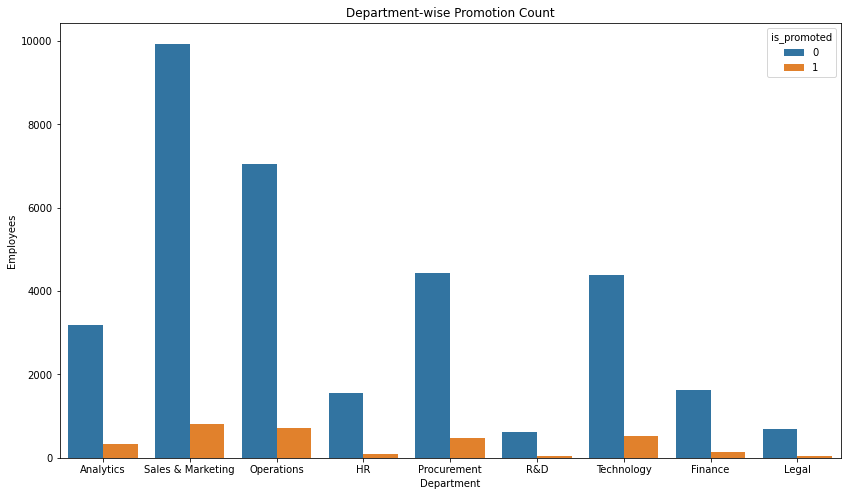

In [106]:
plt.figure(figsize=(14,8))
sns.countplot(x='department',hue='is_promoted',data=train)
plt.title('Department-wise Promotion Count')
plt.xlabel('Department')
plt.ylabel('Employees')
plt.show()

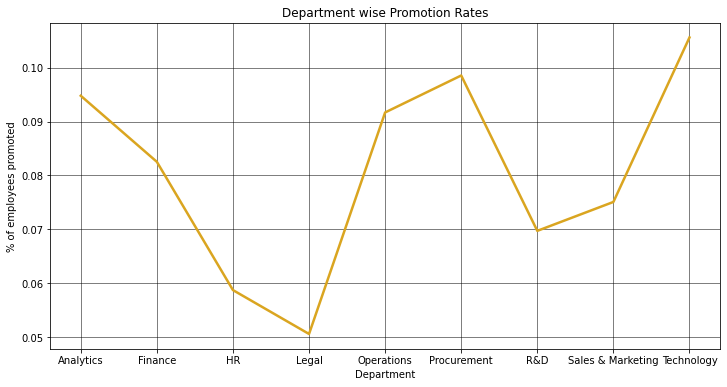

In [107]:
x=train.groupby(['department','is_promoted'])['is_promoted'].count().unstack().fillna(0) #we can also use crosstab function
                                                                                        #here as well
x['%']=x[1]/(x[0]+x[1]) #calculation of promotion %
plt.figure(figsize=(12,6))
plt.plot(x['%'],color='goldenrod', linewidth=2.5)
plt.grid(color = 'black', linestyle = '-', linewidth = 0.5)
plt.title('Department wise Promotion Rates')
plt.xlabel('Department')
plt.ylabel('% of employees promoted')
plt.show()

<b>Insights drawn from the above plots:
1. Technology Dept. has the highest promotion rate across all deparments.
2. Legal Dept. has the lowest promotion rate across all departments.
3. Top 3 Departments to work in on the basis of Promotions are : Technology, Procurement, Analysis</b>

## 2.) EDA BASED ON REGION

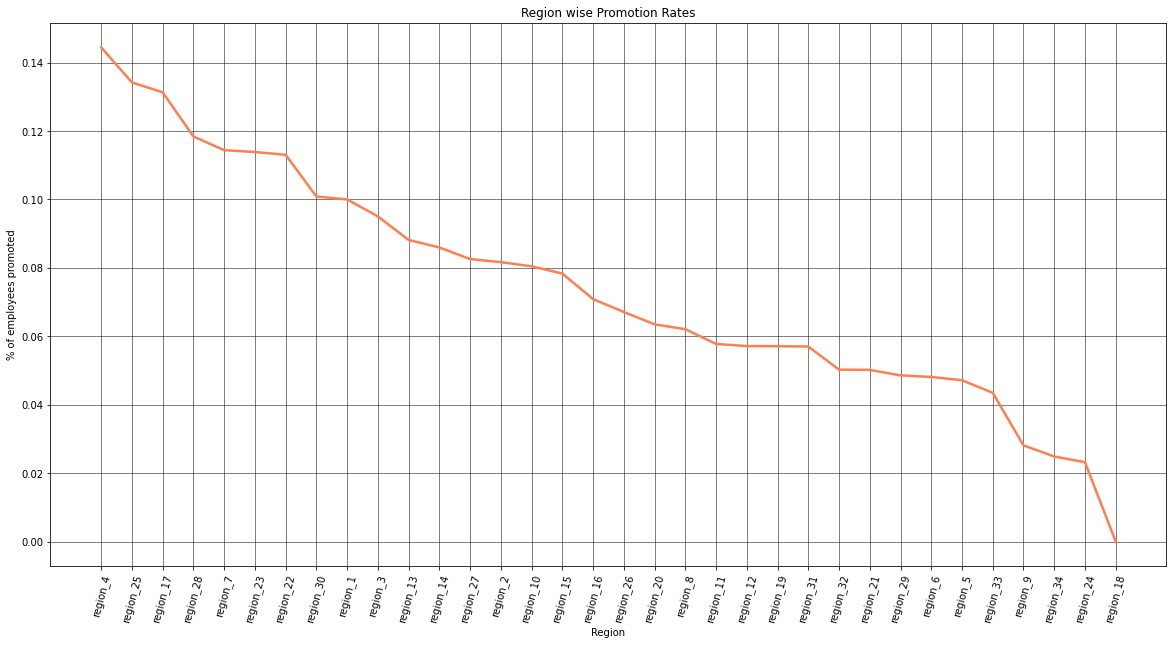

In [108]:
y=train.groupby(['region','is_promoted'])['is_promoted'].count().unstack().fillna(0)
y['%']=y[1]/(y[0]+y[1])#calculation of promotion %
y=y.sort_values('%',ascending=False) #sorting by promotion rate to get insights easily
plt.figure(figsize=(20,10))
plt.plot(y['%'],color='coral', linewidth=2.5)
plt.grid(color = 'black', linestyle = '-', linewidth = 0.5)
plt.title('Region wise Promotion Rates')
plt.xlabel('Region')
plt.xticks(rotation=75)
plt.ylabel('% of employees promoted')
plt.show()

<b>Insights drawn from the above plot:
1. Top 3 Regions in terms of Promotion Rates : Region_4, Region_25, Region_17.
    > Employees in these regions are working hard and are getting rewarded for the same.
2.Bottom 3 Regions in terms of Promotion Rates: Region_18, Region_24, Region_34. 
    > The management should have a discussion with the employees of these regions to figure out a new strategy to increase productivity and employee satisfaction. </b>



## 3.) EDA BASED ON EDUCATION & GENDER

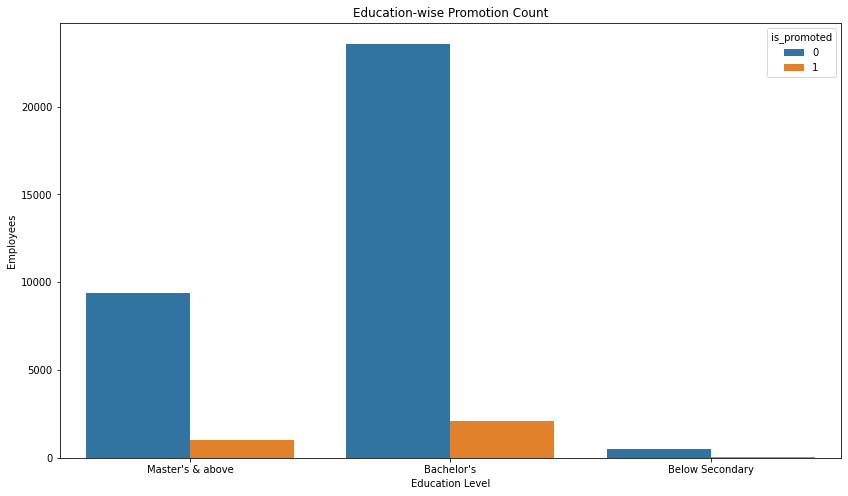

In [109]:
plt.figure(figsize=(14,8))
sns.countplot(x='education',hue='is_promoted',data=train)
plt.title('Education-wise Promotion Count')
plt.xlabel('Education Level')
plt.ylabel('Employees')
plt.show()

<b>Insights drawn from the above plot:
1. Almost 2/3 rd of the workforce holds a Bachelor's Degree or equivalent.
2. Employees with just Secondary Level Education have also been hired.
  > Indicates that the company focuses on skill rather than degree.


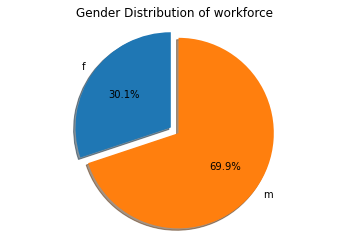

In [110]:
labels = 'f','m'
sizes = list(train.groupby('gender')['gender'].count())
explode=(0.1,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode=explode,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title("Gender Distribution of workforce")
plt.show()

<b>Insights drawn from the above plot:
1. There is a huge difference between the number of male employees and and female employees. 70% of the workforce is made up of male employees.
    > The management should take some steps to bridge this gap and promote gender equality. 


Text(0.5, 1.0, 'Gender wise Distribution of employees getting promoted or not')

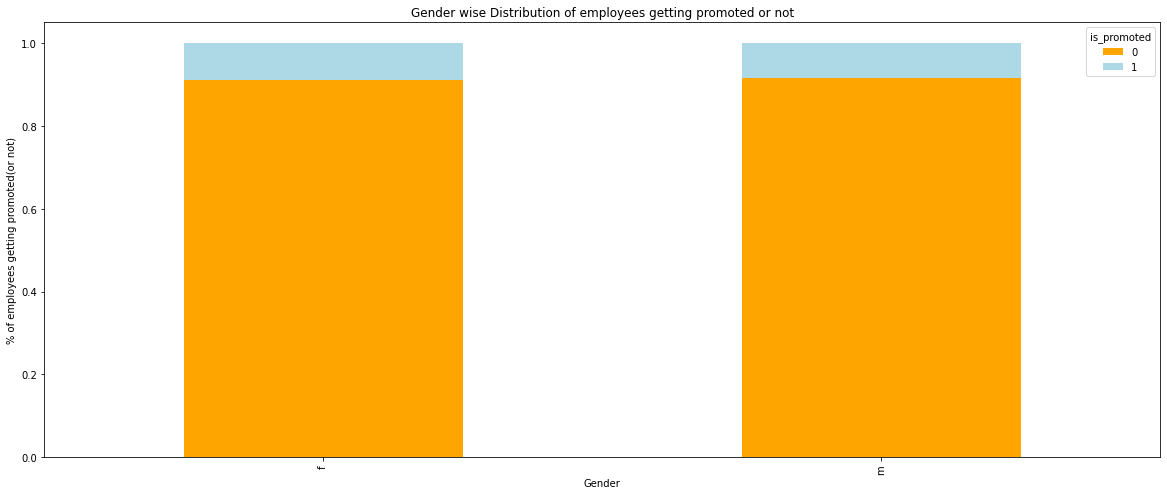

In [111]:
y=train.groupby(['gender','is_promoted'])['is_promoted'].count().unstack().fillna(0)
y1=y.div(y.sum(1).astype('float'), axis = 0)
y1.plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['orange', 'lightblue'])
plt.xlabel('Gender')
plt.ylabel('% of employees getting promoted(or not)')
plt.title("Gender wise Distribution of employees getting promoted or not")

<b>Insights drawn from the above plot:
1. No disparity in promotions of males and females.
    
Moving on to a combined analysis of education and gender.

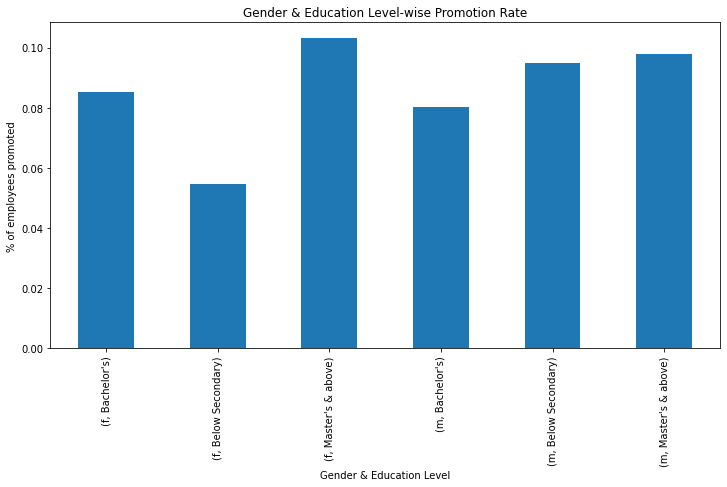

In [112]:
z=train.groupby(['gender','education','is_promoted'])['is_promoted'].count().unstack().fillna(0)
z['%']=z[1]/(z[0] + z[1])#calculation of promotion %
plt.figure(figsize=(12,6))
z['%'].plot.bar()
plt.title('Gender & Education Level-wise Promotion Rate')
plt.xlabel('Gender & Education Level')
plt.ylabel('% of employees promoted')
plt.show()

<b>Insights drawn from the above plot:
1. Female employees with 'Masters & above' education level have the highest rate of getting promoted in the entire company.
  >The company can use this fact to attract more female employees to work for the company 

2. Among the male employees, those with 'Bachelor's' education level have the least chance of getting promoted due to high competition.
  > Employees should upskill themselves to beat the competition

   

## 4.) EDA BASED ON RECRUITMENT CHANNEL

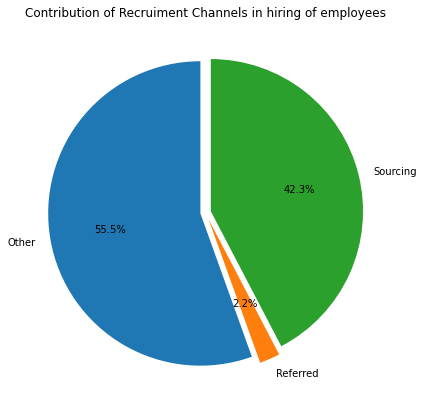

In [113]:
labels='Other','Referred','Sourcing'
sizes = list(train.groupby('recruitment_channel')['recruitment_channel'].count())
explode=(0.035,0.05,0.035)
plt.figure(figsize=(7,7))
plt.pie(sizes,explode=explode,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.title("Contribution of Recruiment Channels in hiring of employees")
plt.show()

<b>Insights drawn from the above plot:
1. 55.5% of employees have been hired through other channels
2. 2.2% employees hired through referrals
  > Indicates that only a handful of people are given referrals
3. 42.3% employees hired through sourcing

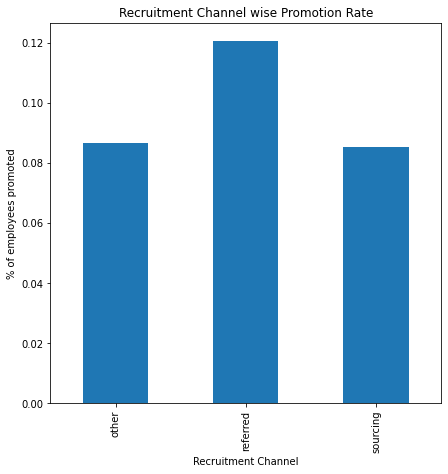

In [114]:
z=train.groupby(['recruitment_channel','is_promoted'])['is_promoted'].count().unstack().fillna(0)
z['%']=z[1]/(z[0] + z[1])#calculation of promotion %
plt.figure(figsize=(7,7))
z['%'].plot.bar()
plt.title('Recruitment Channel wise Promotion Rate')
plt.xlabel('Recruitment Channel')
plt.ylabel('% of employees promoted')
plt.show()

<b>Insights drawn from the above plot:
1. Even though number of employees hired through referrals is the least, the promotion rate is the highest for them.
    > This indicates that employees only give referrals to those people who are expected to excel at their work after getting selected

## 5.) EDA BASED ON NO. OF TRAININGS

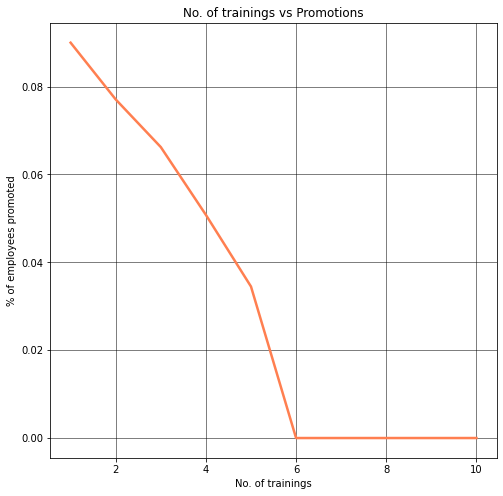

In [115]:
x=train.groupby(['no_of_trainings'])['is_promoted'].value_counts().unstack().fillna(0)
x['%']=x[1]/(x[0] + x[1])#calculation of promotion %
plt.figure(figsize=(8,8))
plt.plot(x['%'],color='coral', linewidth=2.5)
plt.grid(color = 'black', linestyle = '-', linewidth = 0.5)
plt.title('No. of trainings vs Promotions')
plt.xlabel('No. of trainings')
plt.ylabel('% of employees promoted')
plt.show()

<b>Insights drawn from the above plot:
1. Promotion rates decline with an increase in number of trainings done.
    > Promotions and No. of Trainings done may be considered as negatively correlated
   

## 6.) EDA BASED ON AGE

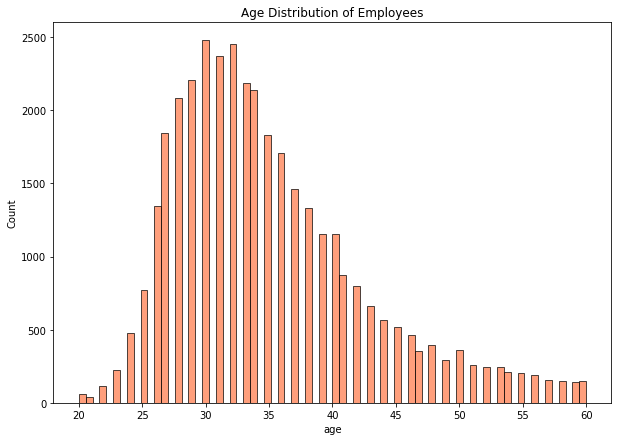

In [116]:
plt.figure(figsize=(10,7))
sns.histplot(train.age,color='coral')
plt.title("Age Distribution of Employees")
plt.show()

<b>Insights drawn from the above plot:
1. The age group of 30-35 has the most number of employees as compared to any other age groups.
  > Signifies that even after gaining moderate amount of experience in the industry, employees prefer to work for this company.
  

Text(0.5, 1.0, 'Age wise Distribution of employees getting promoted or not')

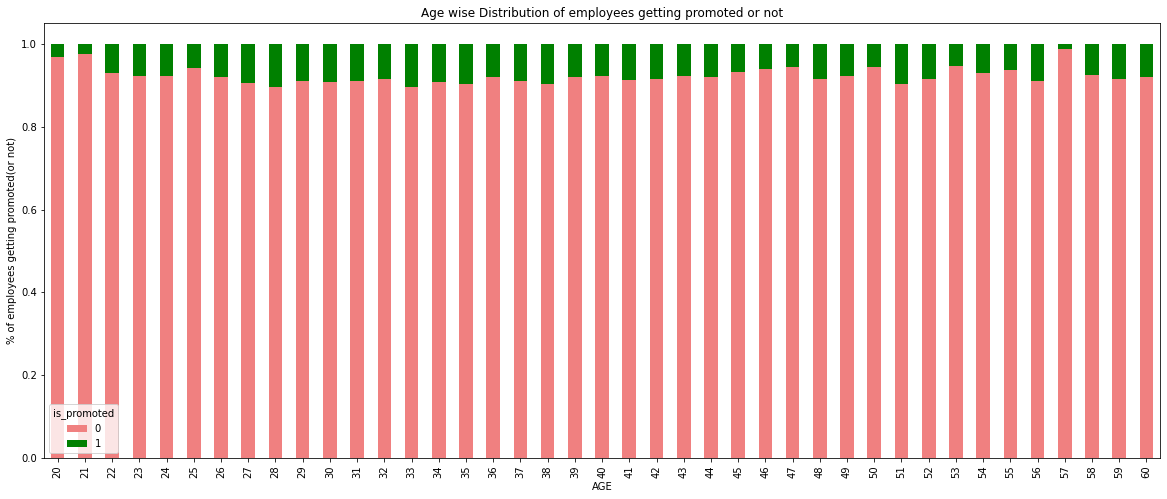

In [117]:
y=train.groupby(['age','is_promoted'])['is_promoted'].count().unstack().fillna(0)
y1=y.div(y.sum(1).astype('float'), axis = 0)
y1.plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['lightcoral', 'green'])
plt.xlabel('AGE')
plt.ylabel('% of employees getting promoted(or not)')
plt.title("Age wise Distribution of employees getting promoted or not")


<b>Insights drawn from the above plot:
1. Almost an even distribution of promotions throughout all ages
2. Even the freshers and the veterans are getting equal shares in promotions
  > This shows that the company really values the work done by employee regardless of age and experience.

## 7.) EDA BASED ON PREVIOUS YEAR RATING

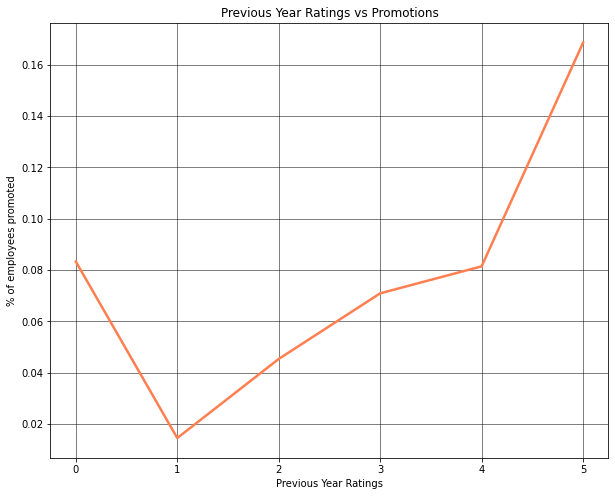

In [118]:
z=train.groupby(['previous_year_rating','is_promoted'])['is_promoted'].count().unstack().fillna(0)
z['%']=z[1]/(z[0] + z[1])#calculation of promotion %
plt.figure(figsize=(10,8))
plt.plot(z['%'],color='coral', linewidth=2.5)
plt.grid(color = 'black', linestyle = '-', linewidth = 0.5)
plt.title('Previous Year Ratings vs Promotions')
plt.xlabel('Previous Year Ratings')
plt.ylabel('% of employees promoted')
plt.show()

<b>Insights drawn from the above plot:
1. As expected , as the ratings increase from 1 to 5 , the % of employees getting  promoted also increases.
  > Employees should work hard to get a good rating in order to get promoted.

NOTE - NOT TAKING RATING = 0 INTO CONSIDERATION


## 8.) EDA BASED ON KPIs MET > 80%

In [119]:
z=train.groupby(['KPIs_met >80%','is_promoted'])['is_promoted'].count().unstack().fillna(0)
z['%']=z[1]/(z[0]+z[1])#calculation of promotion %
z

is_promoted,0,1,%
KPIs_met >80%,,,
0,22686,958,0.040518
1,10811,2224,0.170618


Text(0, 0.5, 'Promotion %')

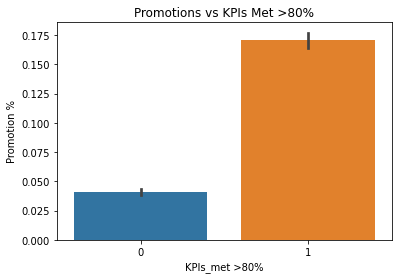

In [120]:
sns.barplot(x=train['KPIs_met >80%'],y=train['is_promoted'])
plt.title("Promotions vs KPIs Met >80%")
plt.ylabel("Promotion %")

<b>Insights drawn from the above plot:
1. Employees whose KPIs Met is > 80% have a very high chance of getting promoted with respect to those who have < 80%.

## 9.) EDA BASED ON AWARDS WON

In [121]:
x=train.groupby(['awards_won?','is_promoted'])['is_promoted'].count().unstack().fillna(0)
x['%']=x[1]/(x[0]+x[1])#calculation of promotion %
x

is_promoted,0,1,%
awards_won?,,,
0,33038,2788,0.077821
1,459,394,0.461899


Text(0.5, 0, 'Awards Won ?')

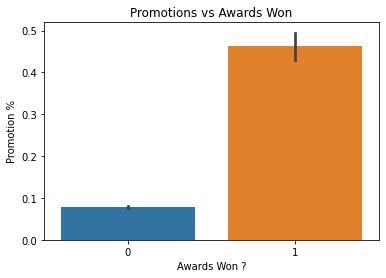

In [122]:
sns.barplot(x=train['awards_won?'],y=train['is_promoted'])
plt.title("Promotions vs Awards Won")
plt.ylabel("Promotion %")
plt.xlabel('Awards Won ?')

<b>Insights drawn from the above plot:
1. Very high chance of getting promoted if the employee has won an award.
  > Company checks whether the employee has won an award or not while promoting so employees should keep in mind to give their best performance.

## 10. EDA BASED ON AVG TRAINING SCORE

Text(0.5, 1.0, 'Avg Training Score wise Distribution of employees getting promoted or not')

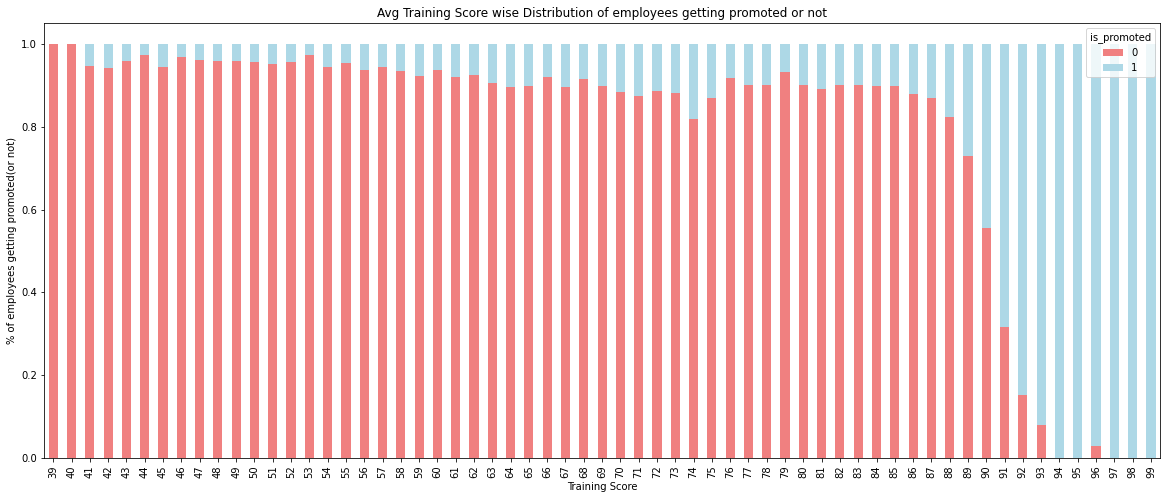

In [123]:
y=train.groupby(['avg_training_score','is_promoted'])['is_promoted'].count().unstack().fillna(0)
y1=y.div(y.sum(1).astype('float'), axis = 0)
y1.plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['lightcoral', 'lightblue'])
plt.xlabel('Training Score')
plt.ylabel('% of employees getting promoted(or not)')
plt.title("Avg Training Score wise Distribution of employees getting promoted or not")

<b>Insights drawn from the above plot:
1. As avg training score increases, chances of promotion increases highly.

### Correlation Matrix

In [124]:
train.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.002969,0.001107,0.003175,-0.000901,-0.005690,0.003104,0.001617,0.000024
no_of_trainings,-0.002969,1.000000,-0.082078,-0.061411,-0.054231,-0.045487,-0.002281,0.044142,-0.027855
age,0.001107,-0.082078,1.000000,0.168735,0.654266,-0.034039,-0.004359,-0.065065,-0.017386
previous_year_rating,0.003175,-0.061411,0.168735,1.000000,0.181587,0.278644,0.022082,0.047982,0.131316
length_of_service,-0.000901,-0.054231,0.654266,0.181587,1.000000,-0.084030,-0.035825,-0.044579,-0.011849
KPIs_met >80%,-0.005690,-0.045487,-0.034039,0.278644,-0.084030,1.000000,0.093300,0.068091,0.221228
awards_won?,0.003104,-0.002281,-0.004359,0.022082,-0.035825,0.093300,1.000000,0.079564,0.205656
avg_training_score,0.001617,0.044142,-0.065065,0.047982,-0.044579,0.068091,0.079564,1.000000,0.179652
is_promoted,0.000024,-0.027855,-0.017386,0.131316,-0.011849,0.221228,0.205656,0.179652,1.000000


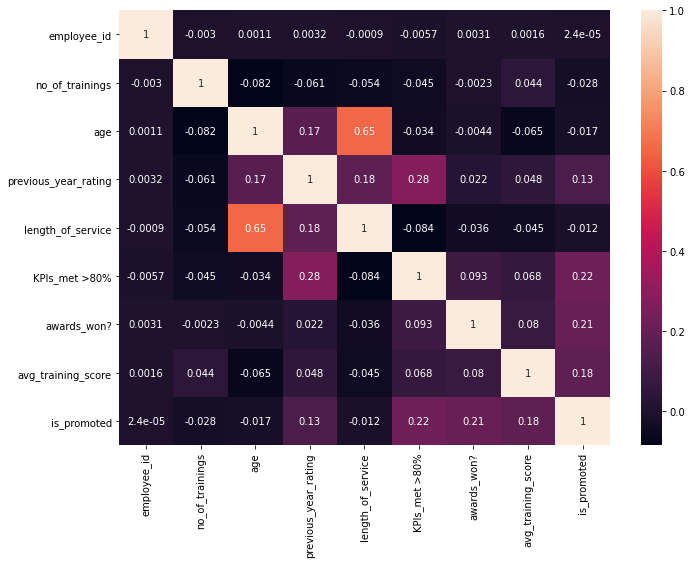

In [125]:
plt.figure(figsize=(11,8))
sns.heatmap(train.corr(),annot=True)
plt.show()

#### Out of all the numerical columns, ''previous_year_rating'', ''KPIs_met>80%'',''awards_won?'' & ''avg_training_score'' seem to be more correlated to the target feature than the others

# <center> ----- FEATURE ENGINEERING ----- </center>

In [126]:
train[train.select_dtypes(include=['object']).columns.tolist()].nunique()


department              9
region                 34
education               3
gender                  2
recruitment_channel     3
dtype: int64

*The columns having less number of categories can be One Hot Encoded. Other columns can be Target encoded*

**Performing One Hot Encoding**

In [127]:
# ONE HOT ENCODING "education" column across all datasets


dummy1=pd.get_dummies(x_train['education'])
x_train=x_train.join(dummy1)

dummy2=pd.get_dummies(x_val1['education'])
x_val1=x_val1.join(dummy2)

dummy3=pd.get_dummies(x_val2['education'])
x_val2=x_val2.join(dummy3)

dummy4=pd.get_dummies(x_test['education'])
x_test=x_test.join(dummy4)

In [128]:
# Education has been encoded so we can drop it

x_train.drop('education',axis=1,inplace=True)
x_val1.drop('education',axis=1,inplace=True)
x_val2.drop('education',axis=1,inplace=True)
x_test.drop('education',axis=1,inplace=True)


In [129]:
x_train.head()
#x_val1.head()
#x_val2.head()

,employee_id,department,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Bachelor's,Below Secondary,Master's & above
770,26952,Analytics,region_13,m,other,1,34,2.0,6,0,0,86,0,0,1
5419,68849,Sales & Marketing,region_22,f,sourcing,1,36,3.0,5,0,0,47,1,0,0
36583,49809,Operations,region_7,f,other,1,32,3.0,7,0,0,59,1,0,0
51379,8384,HR,region_20,f,other,1,35,3.0,5,0,0,51,0,0,1
23322,35781,HR,region_13,m,other,1,39,3.0,11,0,0,49,1,0,0


In [130]:
# ONE HOT ENCODING "gender" column across all datasets


dummy1=pd.get_dummies(x_train['gender'])
x_train=x_train.join(dummy1)

dummy2=pd.get_dummies(x_val1['gender'])
x_val1=x_val1.join(dummy2)

dummy3=pd.get_dummies(x_val2['gender'])
x_val2=x_val2.join(dummy3)

dummy4=pd.get_dummies(x_test['gender'])
x_test=x_test.join(dummy4)

In [131]:
# Gender has been encoded so we can drop it

x_train.drop('gender',axis=1,inplace=True)
x_val1.drop('gender',axis=1,inplace=True)
x_val2.drop('gender',axis=1,inplace=True)
x_test.drop('gender',axis=1,inplace=True)


In [132]:
x_train.head()
#x_val1.head()
#x_val2.head()

,employee_id,department,region,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Bachelor's,Below Secondary,Master's & above,f,m
770,26952,Analytics,region_13,other,1,34,2.0,6,0,0,86,0,0,1,0,1
5419,68849,Sales & Marketing,region_22,sourcing,1,36,3.0,5,0,0,47,1,0,0,1,0
36583,49809,Operations,region_7,other,1,32,3.0,7,0,0,59,1,0,0,1,0
51379,8384,HR,region_20,other,1,35,3.0,5,0,0,51,0,0,1,1,0
23322,35781,HR,region_13,other,1,39,3.0,11,0,0,49,1,0,0,0,1


In [133]:
# ONE HOT ENCODING "recruitment_channel" column across all datasets


dummy1=pd.get_dummies(x_train['recruitment_channel'])
x_train=x_train.join(dummy1)

dummy2=pd.get_dummies(x_val1['recruitment_channel'])
x_val1=x_val1.join(dummy2)

dummy3=pd.get_dummies(x_val2['recruitment_channel'])
x_val2=x_val2.join(dummy3)

dummy4=pd.get_dummies(x_test['recruitment_channel'])
x_test=x_test.join(dummy4)

In [134]:
# Recruitment Channel has been encoded so we can drop it

x_train.drop('recruitment_channel',axis=1,inplace=True)
x_val1.drop('recruitment_channel',axis=1,inplace=True)
x_val2.drop('recruitment_channel',axis=1,inplace=True)
x_test.drop('recruitment_channel',axis=1,inplace=True)


In [135]:
x_train.head()
#x_val1.head()
#x_val2.head()

,employee_id,department,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Bachelor's,Below Secondary,Master's & above,f,m,other,referred,sourcing
770,26952,Analytics,region_13,1,34,2.0,6,0,0,86,0,0,1,0,1,1,0,0
5419,68849,Sales & Marketing,region_22,1,36,3.0,5,0,0,47,1,0,0,1,0,0,0,1
36583,49809,Operations,region_7,1,32,3.0,7,0,0,59,1,0,0,1,0,1,0,0
51379,8384,HR,region_20,1,35,3.0,5,0,0,51,0,0,1,1,0,1,0,0
23322,35781,HR,region_13,1,39,3.0,11,0,0,49,1,0,0,0,1,1,0,0


 **Performing Target Encoding**

In [136]:
#Target Encoding Department
x_train['target'] = y_train
target_mapper = x_train.groupby('department')['target'].mean().to_dict()

In [137]:
#mapping to all datasets
x_train['dept_enc'] = x_train['department'].map(target_mapper)
x_val1['dept_enc'] = x_val1['department'].map(target_mapper)
x_val2['dept_enc'] = x_val2['department'].map(target_mapper)
x_test['dept_enc'] = x_test['department'].map(target_mapper)

In [138]:
x_train.drop('target',axis=1,inplace=True) #dropping temporary column

In [139]:
# Department has been encoded so we can drop it

x_train.drop('department',axis=1,inplace=True)
x_val1.drop('department',axis=1,inplace=True)
x_val2.drop('department',axis=1,inplace=True)
x_test.drop('department',axis=1,inplace=True)


In [140]:
x_train.head()

,employee_id,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Bachelor's,Below Secondary,Master's & above,f,m,other,referred,sourcing,dept_enc
770,26952,region_13,1,34,2.0,6,0,0,86,0,0,1,0,1,1,0,0,0.094779
5419,68849,region_22,1,36,3.0,5,0,0,47,1,0,0,1,0,0,0,1,0.075091
36583,49809,region_7,1,32,3.0,7,0,0,59,1,0,0,1,0,1,0,0,0.091683
51379,8384,region_20,1,35,3.0,5,0,0,51,0,0,1,1,0,1,0,0,0.058752
23322,35781,region_13,1,39,3.0,11,0,0,49,1,0,0,0,1,1,0,0,0.058752


In [141]:
#Target Encoding Region
x_train['target'] = y_train
target_mapper = x_train.groupby('region')['target'].mean().to_dict()

In [142]:
#mapping to all datasets
x_train['region_enc'] = x_train['region'].map(target_mapper)
x_val1['region_enc'] = x_val1['region'].map(target_mapper)
x_val2['region_enc'] = x_val2['region'].map(target_mapper)
x_test['region_enc'] = x_test['region'].map(target_mapper)

In [143]:
x_train.drop('target',axis=1,inplace=True) #dropping temporary column

In [144]:
# Department has been encoded so we can drop it

x_train.drop('region',axis=1,inplace=True)
x_val1.drop('region',axis=1,inplace=True)
x_val2.drop('region',axis=1,inplace=True)
x_test.drop('region',axis=1,inplace=True)


In [145]:
x_train.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Bachelor's,Below Secondary,Master's & above,f,m,other,referred,sourcing,dept_enc,region_enc
770,26952,1,34,2.0,6,0,0,86,0,0,1,0,1,1,0,0,0.094779,0.088154
5419,68849,1,36,3.0,5,0,0,47,1,0,0,1,0,0,0,1,0.075091,0.113043
36583,49809,1,32,3.0,7,0,0,59,1,0,0,1,0,1,0,0,0.091683,0.114391
51379,8384,1,35,3.0,5,0,0,51,0,0,1,1,0,1,0,0,0.058752,0.063492
23322,35781,1,39,3.0,11,0,0,49,1,0,0,0,1,1,0,0,0.058752,0.088154


In [146]:
# Dropping employee_id column

x_train.drop('employee_id',axis=1,inplace=True)
x_val1.drop('employee_id',axis=1,inplace=True)
x_val2.drop('employee_id',axis=1,inplace=True)
x_test.drop('employee_id',axis=1,inplace=True)


In [147]:
x_train.head()
#x_val1.head()
#x_val2.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Bachelor's,Below Secondary,Master's & above,f,m,other,referred,sourcing,dept_enc,region_enc
770,1,34,2.0,6,0,0,86,0,0,1,0,1,1,0,0,0.094779,0.088154
5419,1,36,3.0,5,0,0,47,1,0,0,1,0,0,0,1,0.075091,0.113043
36583,1,32,3.0,7,0,0,59,1,0,0,1,0,1,0,0,0.091683,0.114391
51379,1,35,3.0,5,0,0,51,0,0,1,1,0,1,0,0,0.058752,0.063492
23322,1,39,3.0,11,0,0,49,1,0,0,0,1,1,0,0,0.058752,0.088154


In [148]:
#x_train.isnull().sum()
#x_val1.isnull().sum()
#x_val2.isnull().sum()
#x_test.isnull().sum()


In [149]:
print("train:",x_train.shape)
print("val1:",x_val1.shape)
print("val2:",x_val2.shape)

train: (36679, 17)
val1: (7860, 17)
val2: (7860, 17)


*After performing FE we see that the number of features has not drastically gone up which is a good sign as excess features make the learning process slow*

# <center> ----- FEATURE SELECTION ----- </center>

### Forward Feature Selection

In [150]:
# create the SequentialFeatureSelector object, and configure the parameters.
#sfs = SequentialFeatureSelector(RandomForestClassifier(), 
           #k_features=8, 
           #forward=True, 
           #floating=False,
           #scoring='accuracy',
           #cv=4)

# fit the object to the training data.
#sfs = sfs.fit(x_train, y_train)

# the selected features.
#selected_features = x_train.columns[list(sfs.k_feature_idx_)]

#Constucting a list of selected featues and score
#forward=pd.Series(list(selected_features)).to_frame().append(pd.Series(sfs.k_score_),ignore_index=True)
#forward

### Backward Feature Selection

In [151]:
# create theSequentialFeatureSelector object, and configure the parameters.
#sbs = SequentialFeatureSelector(RandomForestClassifier(), 
           #k_features=8, 
           #forward=False, 
           #floating=False,
           #scoring='accuracy',
           #cv=5)

# fit the object to our training data.
#sbs = sbs.fit(x_train, y_train)

# print the selected features. 
#selected_features = x_train.columns[list(sbs.k_feature_idx_)]

#Constucting a list of selected featues and score
#backward=pd.Series(list(selected_features)).to_frame().append(pd.Series(sbs.k_score_),ignore_index=True)
#backward

### Recursive Elimination of features with Cross Validation

In [152]:
# The "accuracy" scoring is proportional to the number of correct classifications
#clfrf = RandomForestClassifier() 
#rfecv = RFECV(estimator=clfrf, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
#rfecv = rfecv.fit(x_train, y_train)

#print('Optimal number of features :', rfecv.n_features_)
#print('Best features :', x_train.columns[rfecv.support_])

In [153]:
#plt.figure()
#plt.xlabel("Number of features selected")
#plt.ylabel("Cross validation score of number of selected features")
#plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
#plt.show()

### Tree Based FS

In [154]:
def tree_based_feature_importance(x_train,y_train):
    from sklearn.ensemble import RandomForestClassifier
    # create the random forest model
    model = RandomForestClassifier()

    # fit the model to start training.
    model.fit(x_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(6).plot(kind='barh')  
    return final_df

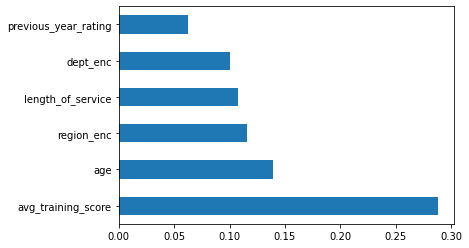

In [155]:
feature_importance=tree_based_feature_importance(x_train,y_train)

In [156]:
display(feature_importance)

,Features,Importances
6,avg_training_score,0.288021
1,age,0.138914
16,region_enc,0.115969
3,length_of_service,0.107630
15,dept_enc,0.100835
2,previous_year_rating,0.062355
4,KPIs_met >80%,0.047375
5,awards_won?,0.033486
0,no_of_trainings,0.024031
12,other,0.014820


***Analysing all the above results and filtering out unimportant features***

In [157]:
# Making a list of selected features
selected_features = ['avg_training_score','dept_enc','age',
                     'length_of_service','previous_year_rating',
                     'KPIs_met >80%','no_of_trainings','awards_won?']
x_train[selected_features].head()

,avg_training_score,dept_enc,age,length_of_service,previous_year_rating,KPIs_met >80%,no_of_trainings,awards_won?
770,86,0.094779,34,6,2.0,0,1,0
5419,47,0.075091,36,5,3.0,0,1,0
36583,59,0.091683,32,7,3.0,0,1,0
51379,51,0.058752,35,5,3.0,0,1,0
23322,49,0.058752,39,11,3.0,0,1,0


In [158]:
#Creating new datasets with just the selected features
x_train_new=x_train[selected_features]
x_val1_new=x_val1[selected_features]
x_val2_new=x_val2[selected_features]
x_test_new=x_test[selected_features]


### Feature Scaling for better processing in models

In [159]:
# # Using Standard Scaler

# scaler = StandardScaler() # create an object
# x_train_scaled = scaler.fit_transform(x_train_new) # fit the scaler to the train set, and then transform it

# x_val1_scaled = scaler.transform(x_val1_new) # transform the val1 set
# x_val2_scaled = scaler.transform(x_val2_new) # transform the val2 set
# x_test_scaled = scaler.transform(x_test_new) # transform the test set
# x_train

# Using MinMax Scaler

scaler = MinMaxScaler() # create an instance
x_train_scaled = scaler.fit_transform(x_train_new) #  fit  the scaler to the train set and then transform it
x_val1_scaled = scaler.transform(x_val1_new) # transform (scale) the val1 set
x_val2_scaled = scaler.transform(x_val2_new) # transform (scale) the val2 set
x_test_scaled = scaler.transform(x_test_new) # transform (scale) the test set


x_train_scaled[:5]


array([[0.78333333, 0.80341177, 0.35      , 0.13888889, 0.4       ,
        0.        , 0.        , 0.        ],
       [0.13333333, 0.44525002, 0.4       , 0.11111111, 0.6       ,
        0.        , 0.        , 0.        ],
       [0.33333333, 0.7470918 , 0.3       , 0.16666667, 0.6       ,
        0.        , 0.        , 0.        ],
       [0.2       , 0.14802191, 0.375     , 0.11111111, 0.6       ,
        0.        , 0.        , 0.        ],
       [0.16666667, 0.14802191, 0.475     , 0.27777778, 0.6       ,
        0.        , 0.        , 0.        ]])

# <center> ----- MODEL TRAINING ----- </center>

## 1. Logistic Regression Classifier


In [160]:
# Fitting Logistic Regression to the Training Set
classifier = LogisticRegression()
classifier.fit(x_train_scaled, y_train)
# Predicting the Train Set Results
y_pred = classifier.predict(x_train_scaled)
# Classification Report
reptrain=classification_report(y_train, y_pred, output_dict=True)
reptrain = pd.DataFrame(reptrain).transpose()

In [161]:
# Predicting the Val1 Set Results
y_pred = classifier.predict(x_val1_scaled)
# Classification Report
repval1=classification_report(y_val1, y_pred, output_dict=True)
repval1 = pd.DataFrame(repval1).transpose()

# Predicting the Val2 Set Results
y_pred = classifier.predict(x_val2_scaled)
# Classification Report
repval2=classification_report(y_val2, y_pred, output_dict=True)
repval2 = pd.DataFrame(repval2).transpose()

res = pd.concat([reptrain[:3],repval1[:3], repval2[:3]], keys=['LGR - Train','LGR - Val1','LGR - Val2']).round(2)
res

precision  recall  f1-score   support
LGR - Train 0              0.92    0.99      0.96  33497.00
            1              0.61    0.08      0.14   3182.00
            accuracy       0.92    0.92      0.92      0.92
LGR - Val1  0              0.92    0.99      0.95   7178.00
            1              0.46    0.06      0.11    682.00
            accuracy       0.91    0.91      0.91      0.91
LGR - Val2  0              0.92    1.00      0.96   7178.00
            1              0.57    0.07      0.12    682.00
            accuracy       0.91    0.91      0.91      0.91

***Evaluation Report for Logistic Regression Classifier***

## 2. Decision Tree Classifier

In [162]:
# Fitting Decision Tree Classifier to the Training Set
classifier = DecisionTreeClassifier()
classifier.fit(x_train_scaled, y_train)
# Predicting the Train Set Results
y_pred = classifier.predict(x_train_scaled)
# Classification Report
reptrain=classification_report(y_train, y_pred, output_dict=True)
reptrain = pd.DataFrame(reptrain).transpose()

In [163]:
# Predicting the Val1 Set Results
y_pred = classifier.predict(x_val1_scaled)
# Classification Report
repval1=classification_report(y_val1, y_pred, output_dict=True)
repval1 = pd.DataFrame(repval1).transpose()

# Predicting the Val2 Set Results
y_pred = classifier.predict(x_val2_scaled)
# Classification Report
repval2=classification_report(y_val2, y_pred, output_dict=True)
repval2 = pd.DataFrame(repval2).transpose()

res = pd.concat([reptrain[:3],repval1[:3], repval2[:3]], keys=['DT - Train','DT - Val1','DT - Val2']).round(2)
res

precision  recall  f1-score   support
DT - Train 0              0.99    1.00      0.99  33497.00
           1              0.99    0.88      0.93   3182.00
           accuracy       0.99    0.99      0.99      0.99
DT - Val1  0              0.95    0.94      0.94   7178.00
           1              0.41    0.43      0.42    682.00
           accuracy       0.90    0.90      0.90      0.90
DT - Val2  0              0.95    0.95      0.95   7178.00
           1              0.43    0.43      0.43    682.00
           accuracy       0.90    0.90      0.90      0.90

***Evaluation Report for Decision Tree Classifier***

## 3. Random Forest Classifier

In [164]:
# Fitting Random Forest Classifier to the Training Set
classifier = RandomForestClassifier()
classifier.fit(x_train_scaled, y_train)
# Predicting the Train Set Results
y_pred = classifier.predict(x_train_scaled)
# Classification Report
reptrain=classification_report(y_train, y_pred, output_dict=True)
reptrain = pd.DataFrame(reptrain).transpose()

In [165]:
# Predicting the Val1 Set Results
y_pred = classifier.predict(x_val1_scaled)
# Classification Report
repval1=classification_report(y_val1, y_pred, output_dict=True)
repval1 = pd.DataFrame(repval1).transpose()

# Predicting the Val2 Set Results
y_pred = classifier.predict(x_val2_scaled)
# Classification Report
repval2=classification_report(y_val2, y_pred, output_dict=True)
repval2 = pd.DataFrame(repval2).transpose()

res = pd.concat([reptrain[:3],repval1[:3], repval2[:3]], keys=['RF - Train','RF - Val1','RF - Val2']).round(2)
res

precision  recall  f1-score   support
RF - Train 0              0.99    1.00      0.99  33497.00
           1              0.97    0.90      0.94   3182.00
           accuracy       0.99    0.99      0.99      0.99
RF - Val1  0              0.94    0.98      0.96   7178.00
           1              0.61    0.33      0.43    682.00
           accuracy       0.92    0.92      0.92      0.92
RF - Val2  0              0.94    0.98      0.96   7178.00
           1              0.65    0.35      0.46    682.00
           accuracy       0.93    0.93      0.93      0.93

***Evaluation Report for Random Forest Classifier***

## 4. XGBoost Classifier

In [166]:
# Fitting XGBoost to the Training Set
classifier = XGBClassifier()
classifier.fit(x_train_scaled, y_train)
# Predicting the Train Set Results
y_pred = classifier.predict(x_train_scaled)
# Classification Report
reptrain=classification_report(y_train, y_pred, output_dict=True)
reptrain = pd.DataFrame(reptrain).transpose()

[13:13:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [167]:
# Predicting the Val1 Set Results
y_pred = classifier.predict(x_val1_scaled)
# Classification Report
repval1=classification_report(y_val1, y_pred, output_dict=True)
repval1 = pd.DataFrame(repval1).transpose()

# Predicting the Val2 Set Results
y_pred = classifier.predict(x_val2_scaled)
# Classification Report
repval2=classification_report(y_val2, y_pred, output_dict=True)
repval2 = pd.DataFrame(repval2).transpose()

res = pd.concat([reptrain[:3],repval1[:3], repval2[:3]], keys=['XGB - Train','XGB - Val1','XGB - Val2']).round(2)
res

precision  recall  f1-score   support
XGB - Train 0              0.95    1.00      0.97  33497.00
            1              0.98    0.42      0.58   3182.00
            accuracy       0.95    0.95      0.95      0.95
XGB - Val1  0              0.94    0.99      0.97   7178.00
            1              0.85    0.32      0.47    682.00
            accuracy       0.94    0.94      0.94      0.94
XGB - Val2  0              0.94    1.00      0.97   7178.00
            1              0.89    0.37      0.52    682.00
            accuracy       0.94    0.94      0.94      0.94

***Evaluation Report for XGBoost Classifier***

## 5. KNN Classifier

In [168]:
# Fitting KNN to the Training Set
classifier = KNeighborsClassifier()
classifier.fit(x_train_scaled, y_train)
# Predicting the Train Set Results
y_pred = classifier.predict(x_train_scaled)
# Classification Report
reptrain=classification_report(y_train, y_pred, output_dict=True)
reptrain = pd.DataFrame(reptrain).transpose()

In [169]:
# Predicting the Val1 Set Results
y_pred = classifier.predict(x_val1_scaled)
# Classification Report
repval1=classification_report(y_val1, y_pred, output_dict=True)
repval1 = pd.DataFrame(repval1).transpose()

# Predicting the Val2 Set Results
y_pred = classifier.predict(x_val2_scaled)
# Classification Report
repval2=classification_report(y_val2, y_pred, output_dict=True)
repval2 = pd.DataFrame(repval2).transpose()


#Overall Report
res = pd.concat([reptrain[:3],repval1[:3], repval2[:3]], keys=['KNN - Train','KNN - Val1','KNN - Val2']).round(2)
res

precision  recall  f1-score   support
KNN - Train 0              0.94    0.99      0.97  33497.00
            1              0.84    0.38      0.52   3182.00
            accuracy       0.94    0.94      0.94      0.94
KNN - Val1  0              0.93    0.99      0.96   7178.00
            1              0.61    0.23      0.33    682.00
            accuracy       0.92    0.92      0.92      0.92
KNN - Val2  0              0.94    0.99      0.96   7178.00
            1              0.70    0.29      0.41    682.00
            accuracy       0.93    0.93      0.93      0.93

***Evaluation Report for KNN Classifier***

<br>**We see that out of the 5 models used Random Forest Classifier and XGB Classifier have the best performance.**

**So we will proceed with these 2 models and tune their hyperparameters and then select the best model for our final test set prediction** <br>

<br>

# <center> ----- HYPERPARAMETER TUNING ----- </center>

## 1. Random Forest Classifier

***Checking default parameters :***

In [170]:
from pprint import pprint

# To look at the available hyperparameters, we can create a random forest and examine the default values.

rf = RandomForestClassifier(random_state = 42)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


***Constructing a grid:***

In [171]:
#To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)



{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 6],
 'min_samples_split': [2, 5, 10, 15],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


***Grid Size : 2 x 12 x 2 x 4 x 4 x 10 = 7680***

In [172]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestClassifier(random_state = 1)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 4,scoring='f1',verbose=3, random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random.fit(x_train_scaled, y_train)

In [173]:
#rf_random.best_params_ #Best values of selected parameters

In [174]:
#rf_random.best_estimator_

#### We have our best set of tuned hyperparameters for the Random Forest Classifier.
#### Now applying these and again predicting

In [175]:
# Fitting Random Forest Classifier to the Training Set
classifier = RandomForestClassifier(bootstrap=False, max_depth=50, max_features='sqrt',
                       min_samples_split=15, n_estimators=400, random_state=1)

classifier.fit(x_train_scaled, y_train)
# Predicting the Train Set Results
y_pred = classifier.predict(x_train_scaled)
# Classification Report
reptrain=classification_report(y_train, y_pred, output_dict=True)
reptrain = pd.DataFrame(reptrain).transpose()

In [176]:
# Predicting the Val1 Set Results
y_pred = classifier.predict(x_val1_scaled)
# Classification Report
repval1=classification_report(y_val1, y_pred, output_dict=True)
repval1 = pd.DataFrame(repval1).transpose()

# Predicting the Val2 Set Results
y_pred = classifier.predict(x_val2_scaled)
# Classification Report
repval2=classification_report(y_val2, y_pred, output_dict=True)
repval2 = pd.DataFrame(repval2).transpose()

res = pd.concat([reptrain[:3],repval1[:3], repval2[:3]], keys=['RF - Train','RF - Val1','RF - Val2']).round(2)
res

precision  recall  f1-score   support
RF - Train 0              0.95    1.00      0.97  33497.00
           1              0.97    0.47      0.63   3182.00
           accuracy       0.95    0.95      0.95      0.95
RF - Val1  0              0.94    1.00      0.97   7178.00
           1              0.87    0.30      0.45    682.00
           accuracy       0.94    0.94      0.94      0.94
RF - Val2  0              0.94    1.00      0.97   7178.00
           1              0.88    0.34      0.50    682.00
           accuracy       0.94    0.94      0.94      0.94

### We see that after predicting on the tuned Random Forest Classifier, the evaluation metrics have imporved significantly.

<br>

## 2. XGB Classifier

***Checking default parameters***

In [177]:
# To look at the available hyperparameters, we can create a random forest and examine the default values.

xgb = XGBClassifier(random_state = 42)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(xgb.get_params())

Parameters currently in use:

{'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'binary:logistic',
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'use_label_encoder': True,
 'validate_parameters': None,
 'verbosity': None}


***Constructing Grid***

In [178]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7, 9, 11 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ,0.5],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

***Grid Size : 7 x 8 x 6 x 6 x 4 = 8064 ***

***Applying Random Search***

In [179]:
#Running random search
#xgb= XGBClassifier()
#xgb_random=RandomizedSearchCV(xgb,param_distributions=params,n_iter=50,scoring='f1',n_jobs=-1,cv=4,verbose=3)
#xgb_random.fit(x_train_scaled,y_train)


In [180]:
#xgb_random.best_params_ #Best values of selected parameters

In [181]:
#xgb_random.best_estimator_

#### We have our best set of tuned hyperparameters for the XGB Classifier.
#### Now applying these and again predicting

In [182]:
# Fitting XGBoost to the Training Set
classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=3,monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
classifier.fit(x_train_scaled, y_train)
# Predicting the Train Set Results
y_pred = classifier.predict(x_train_scaled)
# Classification Report
reptrain=classification_report(y_train, y_pred, output_dict=True)
reptrain = pd.DataFrame(reptrain).transpose()

[13:13:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [183]:
# Predicting the Val1 Set Results
y_pred = classifier.predict(x_val1_scaled)
# Classification Report
repval1=classification_report(y_val1, y_pred, output_dict=True)
repval1 = pd.DataFrame(repval1).transpose()

# Predicting the Val2 Set Results
y_pred = classifier.predict(x_val2_scaled)
# Classification Report
repval2=classification_report(y_val2, y_pred, output_dict=True)
repval2 = pd.DataFrame(repval2).transpose()

res = pd.concat([reptrain[:3],repval1[:3], repval2[:3]], keys=['XGB - Train','XGB - Val1','XGB - Val2']).round(2)
res

precision  recall  f1-score   support
XGB - Train 0              0.94    1.00      0.97  33497.00
            1              0.97    0.38      0.55   3182.00
            accuracy       0.95    0.95      0.95      0.95
XGB - Val1  0              0.94    1.00      0.97   7178.00
            1              0.90    0.32      0.47    682.00
            accuracy       0.94    0.94      0.94      0.94
XGB - Val2  0              0.94    1.00      0.97   7178.00
            1              0.92    0.36      0.52    682.00
            accuracy       0.94    0.94      0.94      0.94

## We see that the XGB Classfier performs better than Random Forest. So we select it for our final predictions.


# <center> ----- MAKING PREDICTIONS ON TEST SET ----- </center>
<br>

In [184]:
#We will now make final predictions on XGBoost Classifier model

xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=3,monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

xgb.fit(x_train_scaled, y_train)

y_test_predicted = xgb.predict(x_test_scaled) #predicting test data
y_test_predicted


[13:13:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0, 0, 0, ..., 0, 0, 1])

In [185]:
promotions_pred= pd.Series(y_test_predicted)
promotions_pred.shape

(22456,)

In [186]:
promotions_pred.value_counts().to_frame()

,0
0,21747
1,709


**The model has predicted that out of 22456 employees in the test set, 21749 will not get promotions and 707 employees will be promoted**

In [187]:
id=pd.Series(test.employee_id).reset_index().drop('index',axis=1)

In [188]:
# Mapping employee ids of test set with their promotion status for a better understanding

result=pd.concat([id,promotions_pred],axis=1,ignore_index=True)

In [189]:
#final answer on test set
result.columns=['employee_id','is_promoted']
result

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
22451,53478,0
22452,25600,0
22453,45409,0
22454,1186,0


### Final Result showing the employees and their promotion status

## THANK YOU...

# Upvote and drop a comment if you liked it.